In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dataset_name = 'airline_cs'
# dataset_name = 'airline_cs2'
# dataset_name = 'breast_cancer_int'
dataset_name = 'airline_koniec'

path = f"../out/{dataset_name}/random_forest_classifier.csv"
df = pd.read_csv(path)

In [3]:
aa = df['n_trees']

small_forest = df[(df["n_trees"] >= 10) & (df["n_trees"] <= 50)].round(2)
big_forest = df[(df["n_trees"] >= 100) & (df["n_trees"] <= 500)].round(2)

## Save plots

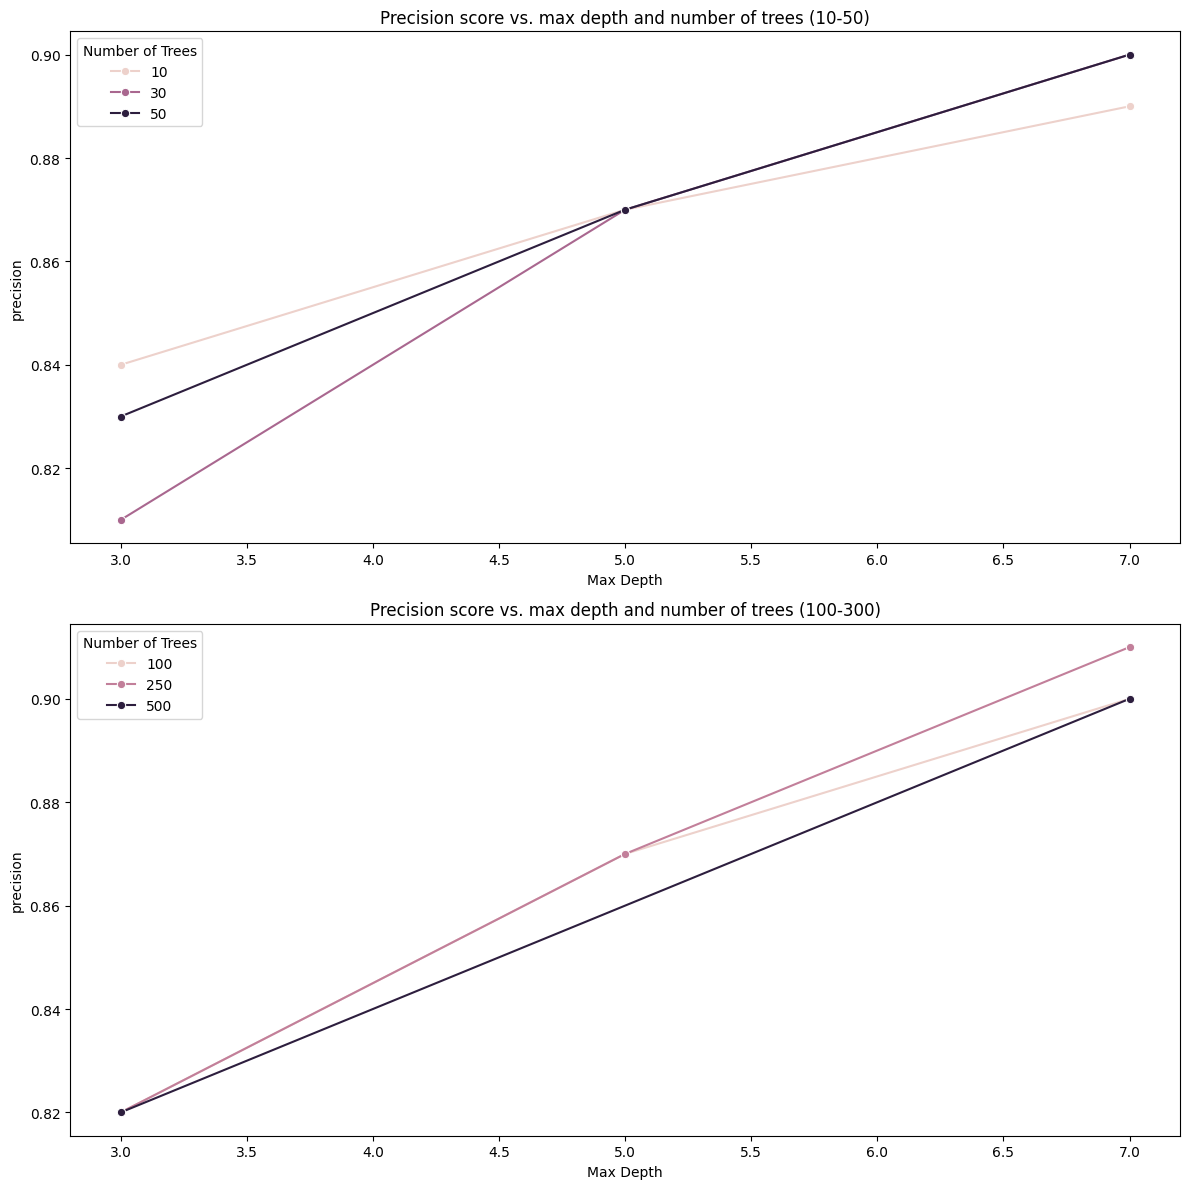

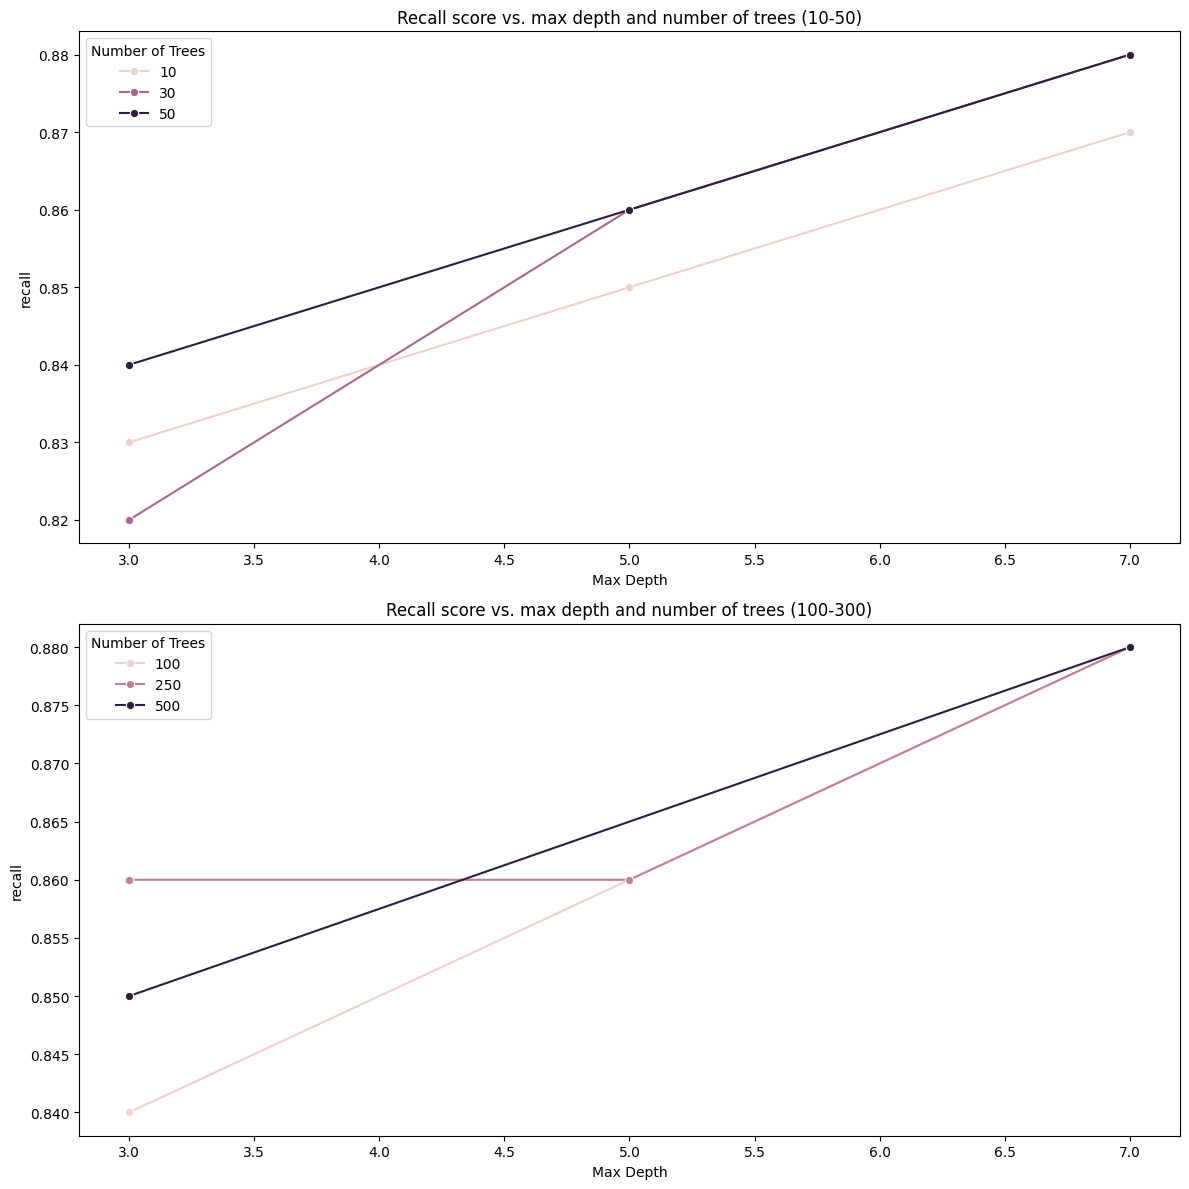

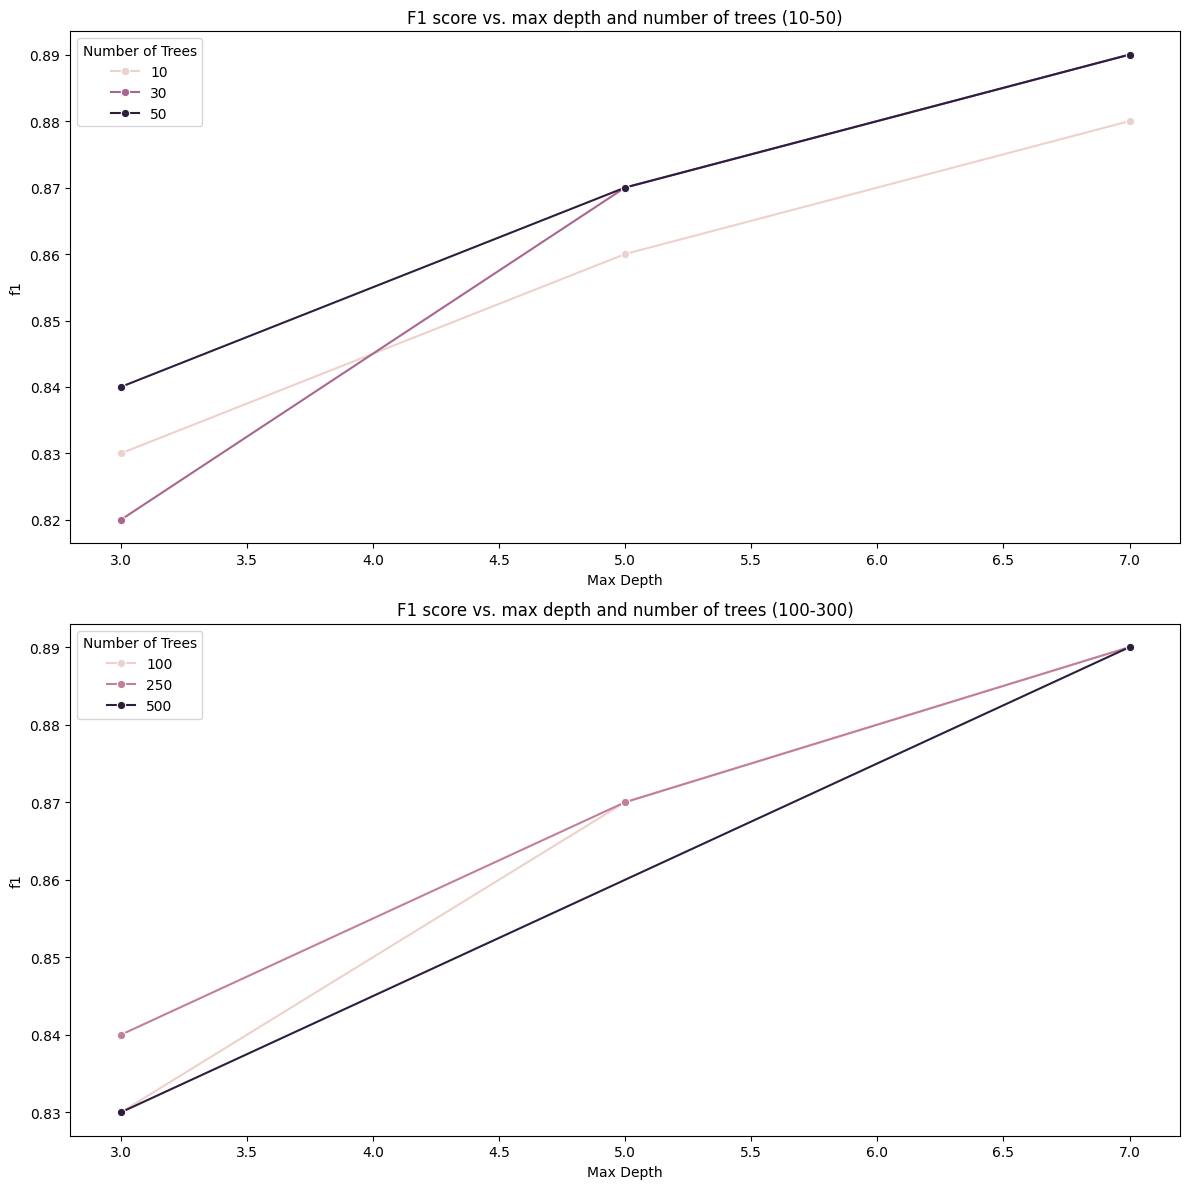

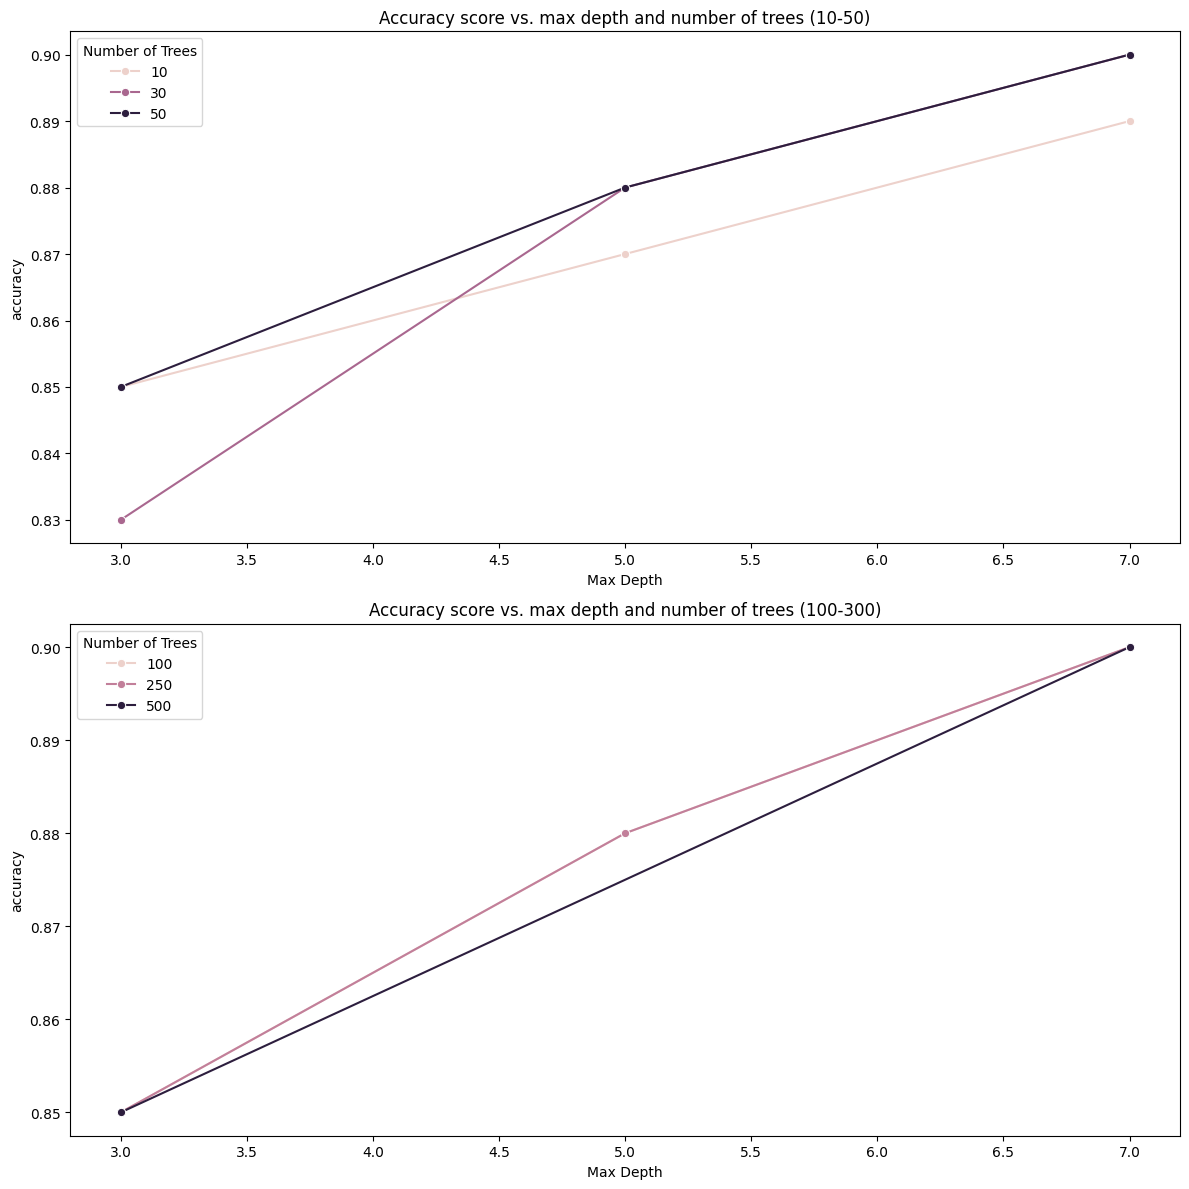

In [4]:
scores = ["precision", "recall", "f1", "accuracy"]
labels = ["Precision", "Recall", "F1", "Accuracy"]

for score, label in zip(scores, labels): 
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))

    sns.lineplot(ax=axes[0], data=small_forest, x="max_depth", y=score, hue="n_trees", marker="o")
    axes[0].set_title(f"{label} score vs. max depth and number of trees (10-50)")
    axes[0].set_xlabel("Max Depth")
    axes[0].set_ylabel(score)
    axes[0].legend(title="Number of Trees")

    sns.lineplot(ax=axes[1], data=big_forest, x="max_depth", y=score, hue="n_trees", marker="o")
    axes[1].set_title(f"{label} score vs. max depth and number of trees (100-300)")
    axes[1].set_xlabel("Max Depth")
    axes[1].set_ylabel(score)
    axes[1].legend(title="Number of Trees")

    plt.tight_layout()
    plt.savefig(f"../out/{dataset_name}/random_forest_classifier_{score}.png")

In [5]:
path = f"../out/{dataset_name}/tournament_forest_classifier.csv"
df = pd.read_csv(path)

In [6]:

tournament_sizes = [3, 5, 7]

for t_size in tournament_sizes:
    # a = df["tournament_size"]
    # b = a == t_size
    # c = df[b]
    # tournament_df= df[df["tournament_size"] == t_size]
    tournament_df= df[df["tournament_size"] == t_size].round(2)

    table = tournament_df.pivot_table(index='max_depth', columns='n_trees', values=['accuracy'])
    print(table)
    

          accuracy                              
n_trees        10    30    50    100   250   500
max_depth                                       
3             0.58  0.66  0.61  0.64  0.64   NaN
5             0.74  0.73  0.75  0.73  0.73   NaN
7             0.78  0.79  0.79  0.80  0.80  0.79
          accuracy                              
n_trees        10    30    50    100   250   500
max_depth                                       
3             0.71  0.74  0.68  0.72  0.70   NaN
5             0.76  0.79  0.77  0.79  0.79   NaN
7             0.77  0.81  0.81  0.81  0.83  0.83
          accuracy                              
n_trees        10    30    50    100   250   500
max_depth                                       
3             0.75  0.68  0.71  0.70  0.71   NaN
5             0.73  0.76  0.74  0.78  0.80   NaN
7             0.75  0.79  0.81  0.83   NaN  0.81


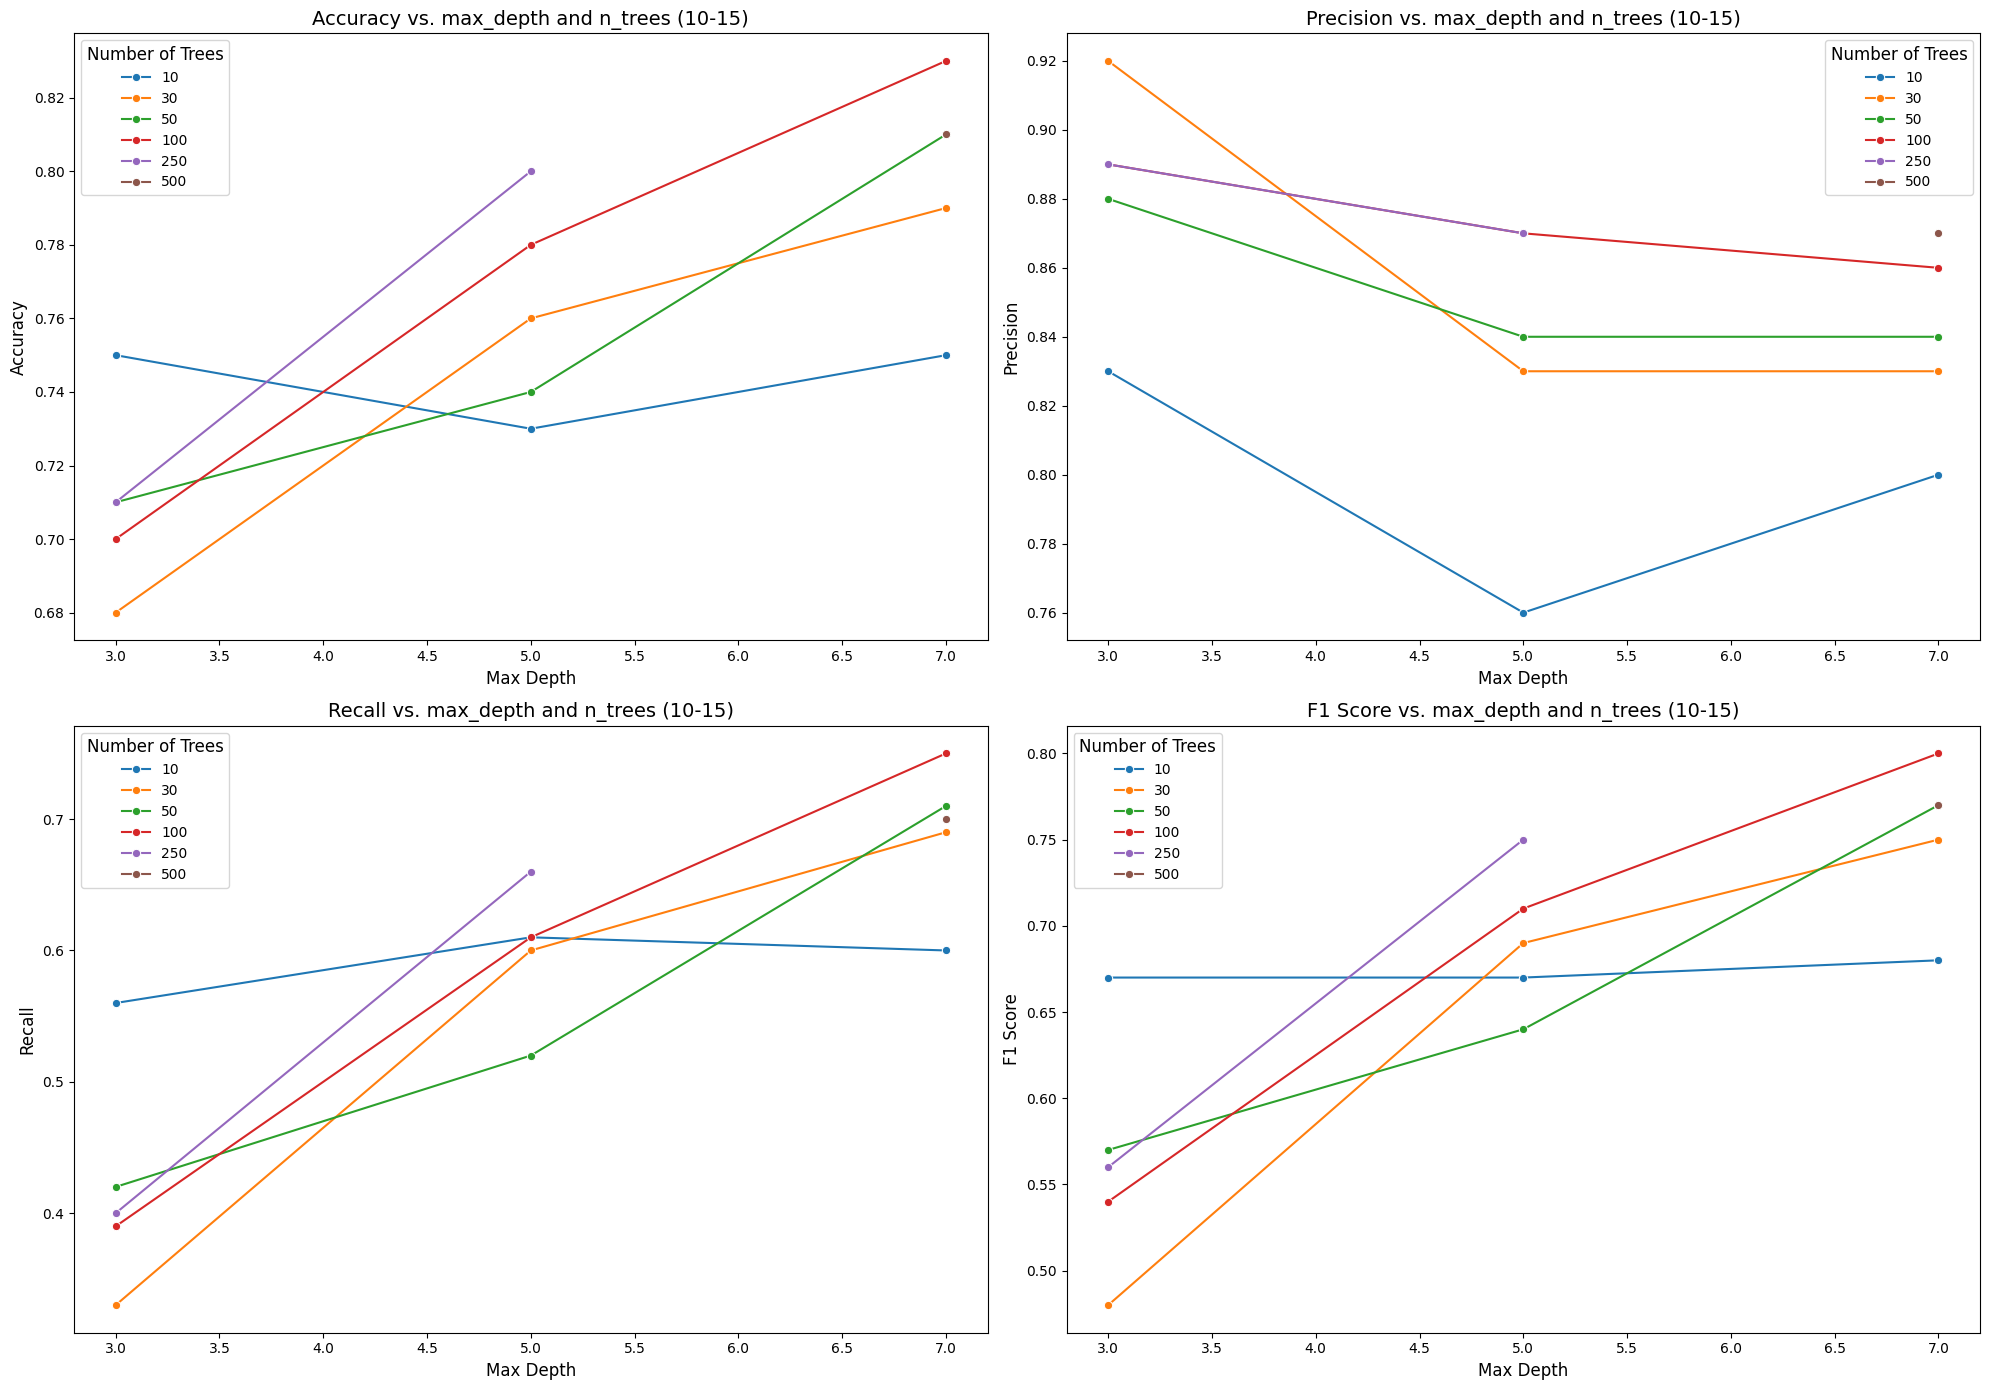

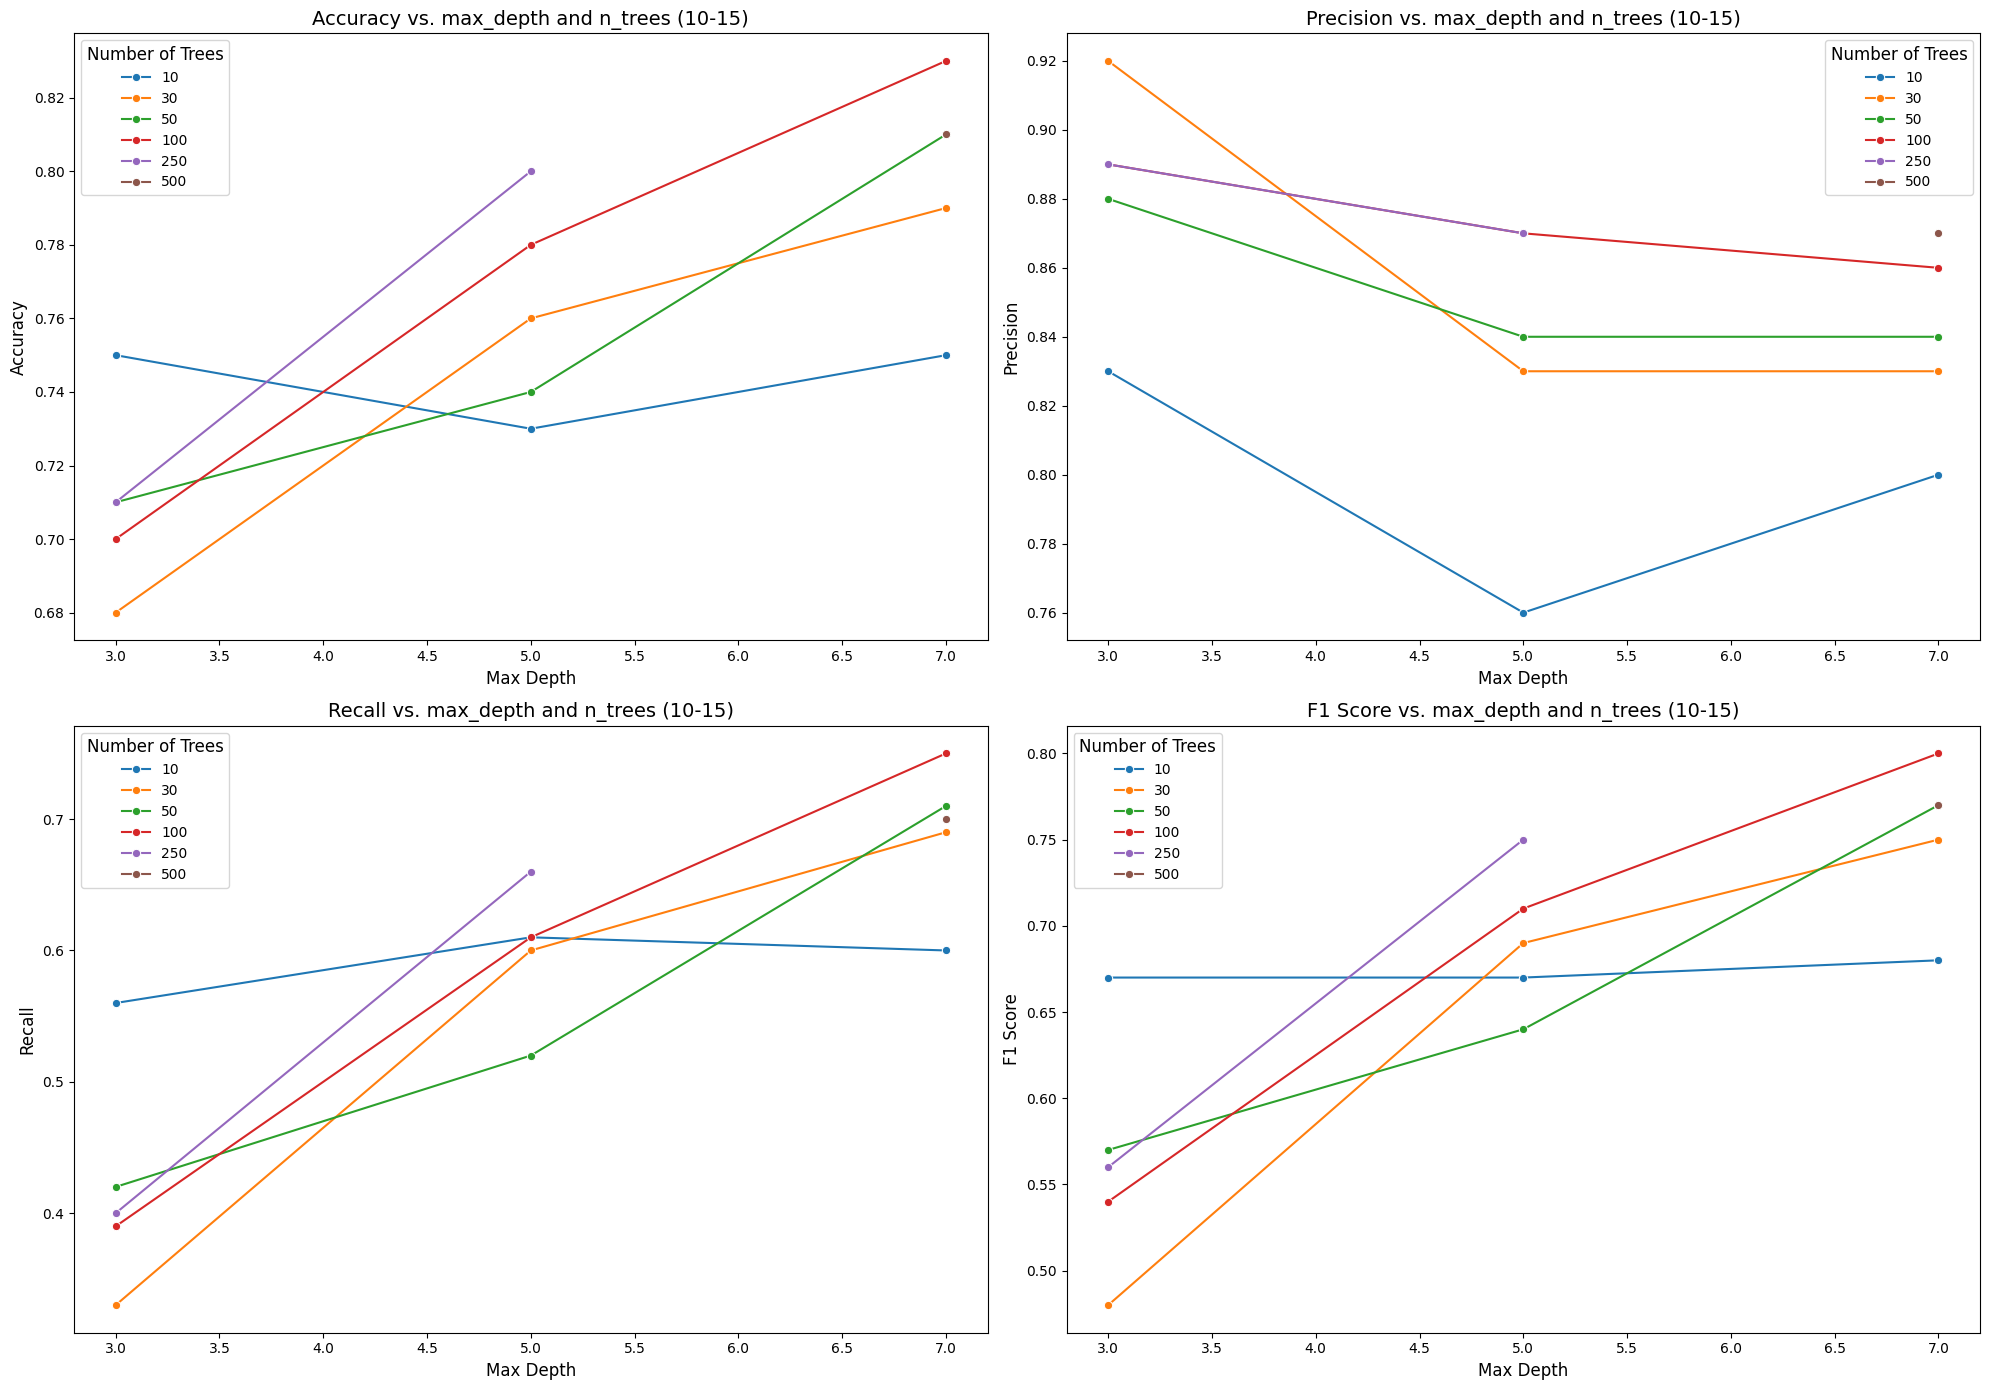

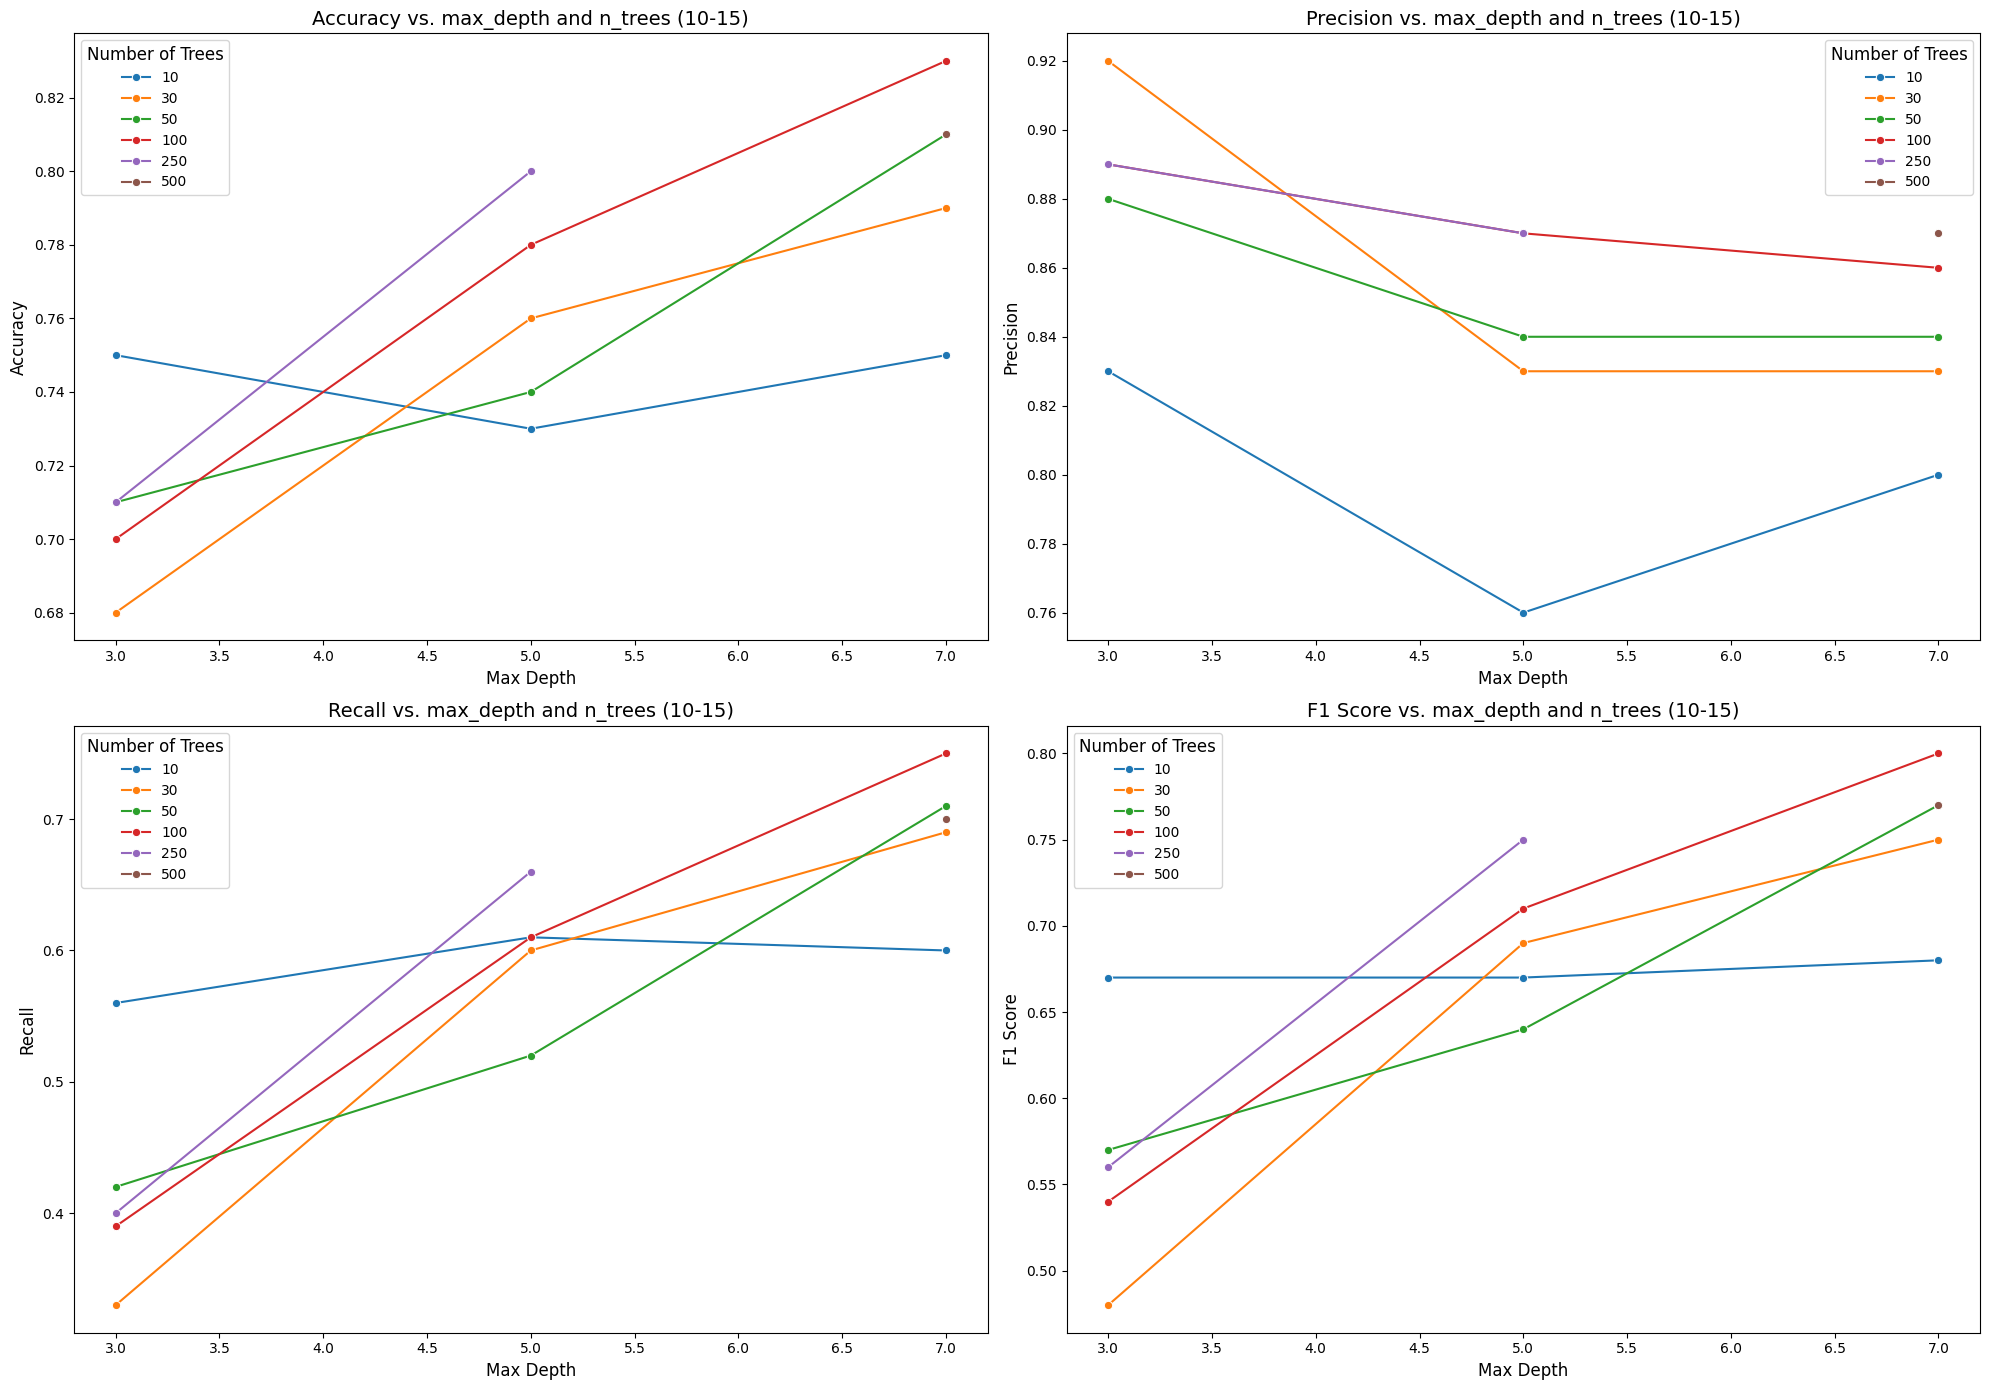

In [7]:
scores = ["precision", "recall", "f1", "accuracy"]
labels = ["Precision", "Recall", "F1", "Accuracy"]

for tournament in tournament_sizes:
    tournament_df = df[df["tournament_size"] == t_size].round(2)
    # Create the figure and axes with a larger size for better readability
    fig, axes = plt.subplots(2, 2, figsize=(20, 14))

    # Accuracy plot
    sns.lineplot(ax=axes[0, 0], data=tournament_df, x='max_depth', y='accuracy', hue='n_trees', marker='o', palette='tab10')
    axes[0, 0].set_title('Accuracy vs. max_depth and n_trees (10-15)', fontsize=14)
    axes[0, 0].set_xlabel('Max Depth', fontsize=12)
    axes[0, 0].set_ylabel('Accuracy', fontsize=12)
    axes[0, 0].legend(title='Number of Trees', fontsize=10, title_fontsize=12)

    # Precision plot
    sns.lineplot(ax=axes[0, 1], data=tournament_df, x='max_depth', y='precision', hue='n_trees', marker='o', palette='tab10')
    axes[0, 1].set_title('Precision vs. max_depth and n_trees (10-15)', fontsize=14)
    axes[0, 1].set_xlabel('Max Depth', fontsize=12)
    axes[0, 1].set_ylabel('Precision', fontsize=12)
    axes[0, 1].legend(title='Number of Trees', fontsize=10, title_fontsize=12)

    # Recall plot
    sns.lineplot(ax=axes[1, 0], data=tournament_df, x='max_depth', y='recall', hue='n_trees', marker='o', palette='tab10')
    axes[1, 0].set_title('Recall vs. max_depth and n_trees (10-15)', fontsize=14)
    axes[1, 0].set_xlabel('Max Depth', fontsize=12)
    axes[1, 0].set_ylabel('Recall', fontsize=12)
    axes[1, 0].legend(title='Number of Trees', fontsize=10, title_fontsize=12)

    # F1 Score plot
    sns.lineplot(ax=axes[1, 1], data=tournament_df, x='max_depth', y='f1', hue='n_trees', marker='o', palette='tab10')
    axes[1, 1].set_title('F1 Score vs. max_depth and n_trees (10-15)', fontsize=14)
    axes[1, 1].set_xlabel('Max Depth', fontsize=12)
    axes[1, 1].set_ylabel('F1 Score', fontsize=12)
    axes[1, 1].legend(title='Number of Trees', fontsize=10, title_fontsize=12)

    plt.tight_layout()
    plt.savefig(f"../out/{dataset_name}/tournament_{tournament}.png")